#  <center> 🔥 An Introduction to Neural Networks with Pytorch 🌐</center>

## What is in this notebook?

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is a Neural Network?
    - 1.2 How does a Neural Network work?
        
        
- [2. How to construct a Neural Network?](#2)
    - 2.1 Activation Functions
    - 2.2 Forward Propagation
    - 2.3 Loss Functions
    - 2.4 Backpropagation
    - 2.5 Gradient Descent
    - 2.6 Sum it up!
    
    
- [3. Example: Simulating Logistic Regression with NN](#3)
    - 3.1 Logistic Regression
    - 3.2 Neural Network with Pytorch
    
    
- [4. Example: Classification with Neural Networks](#3)
    - 4.1 Batch Inputs
    - 4.2 Neural Network with Pytorch

<a id="1"></a>

# <center>Introduction</center>

## What is a Nerual Network?

**`Neural Networks`** is a machine learning algorithm that **recognizes patterns in data** using a structure similar to that of a **human brain**.

In human brains, **neurons** communicate with each other through **electrical signals** so that a decision can be made. Neural Networks mimick such a **decision-making** process with a **network-like structure** where the **nodes** are the **'neurons'** and the **connections** are the **'signals'**:

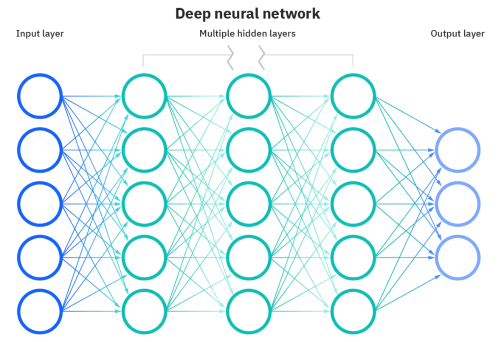

Image Source: https://www.ibm.com/uk-en/cloud/learn/neural-networks

As demonstrated in the above diagram, a neural network is constructed of nodes connected to one another where a **column of nodes** form a **layer**. The outermost are the **input and output layers** and all those in between are called the **hidden layers**.

## How does a Neural Network work?

A Neural Network can **approximate any complicated relationships** (linear or non-linear) between the inputs and outputs by **composing linear functions and non-linear thresholds**.

Let me elaborate on what this means:

1. **`Linear Functions`**: a node in connected to another with an associated **weight ($w$)** and **bia ($b$)** so that it will received a **weighted value ($wx+b$)** from a node in the **previous layer**. 


2. **`Non-linear Thresholds`**: each node contains an **activation function** that activates the node (so the input can pass through the node) when the **input** of the node is **above a certain threshold**.

A little bit confused right? Time for some visualizations to help you understand the concepts:

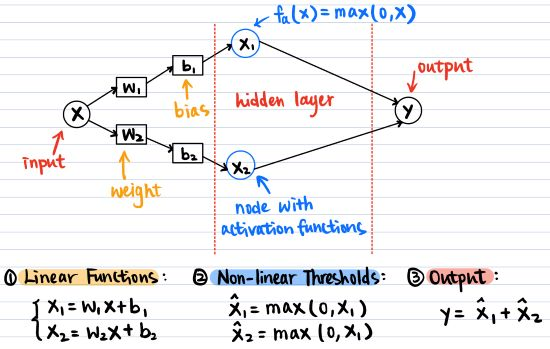

The above example demonstrates how a neural network models the **relationship between the x and y** through composing **linear functions** and **non-linear thresholds**. Now, let's dive deeper into the concepts and learn about how to construct a neural network so that it best fits the data.

<a id="2"></a>

# <center>How to construct a Neural Network?</center>

## Activation Functions

In human brains, **neurons** are activated when the **electric signal** that pass through it is **strong enough**.

To simulate this behaviour, **`activation functions`** are used in neural networks so that a node will only be **activated** when the input is **above a certain threshold**. When a node is active, the input will pass through it and be sent to the next node. Otherwise, a **zero or a very low value** will be passed instead.

There are many commonly used activation functions:

1. **`ReLU`**: Rectified Linear Unit function, $f(x) = max(0,x)$

2. **`Sigmoid`**: $s(x) = \dfrac{1}{1 + e^{-x}}$

3. **`Softplus`**: smoothed approximation of the ReLU function, $sp(x) =  \log(1 + e^{x})$

4. **`Softmax`**: normalize the output to a probability distribution, $\text{softmax}(x) = \frac{e^{x} }{\sum_{i=1}^{N} e^{x} }$

Let me show you what they look like:

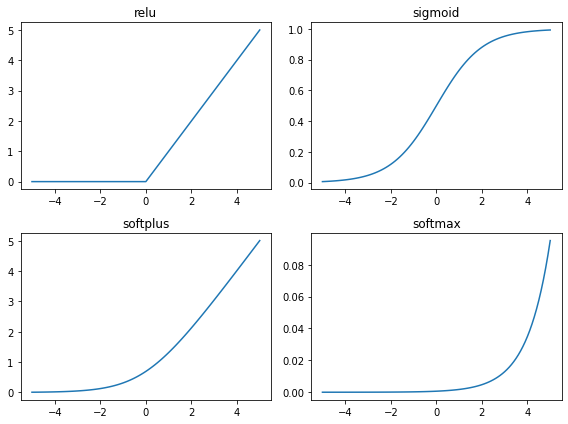

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#define the activation functions
def relu(z):
    return np.maximum(0,z)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def softplus(x):
    return np.log(1 + np.exp(x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def plot_function(f,ax):
    x = np.arange(-5, 5 + 0.1, 0.1)
    ax.plot(x, f(x))
    title = f.__name__
    ax.set_title('%s' % title)
    
#plot the activation functions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
plot_function(relu,axes[0,0])
plot_function(sigmoid,axes[0,1])
plot_function(softplus,axes[1,0])
plot_function(softmax,axes[1,1])
plt.tight_layout()
plt.show()

Now you have a better understanding of what **activation functions** are and why they are used, let's move onto exploring the **first step** of implementing a neural network: **forward propagation**.

## Forward Propagation

**`Forward propagation`** is the process of obtaining the **predicted output $\hat{y}$** starting from the **input $x$** layer-by-layer.

Guess what, I have already shown you what **forward propagation** is like at the very beginning of this notebook:

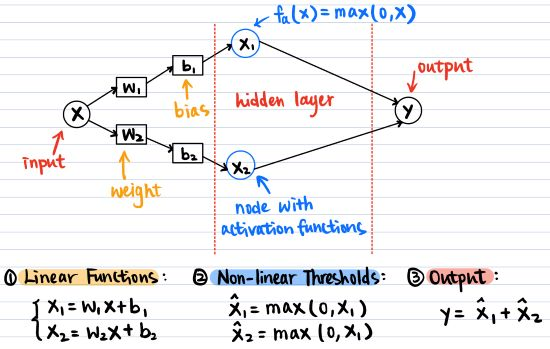

In the above example, the **forward propagation** process is: 

Step 1: $x$ to $(x_{1},x_{2})$ adjusted by the weight $w$ and the bias $b$

Step 2: $(x_{1},x_{2})$ to $(\hat{x}_{1},\hat{x}_{2})$ through the **ReLU** activation function

Step 3: $(\hat{x}_{1},\hat{x}_{2})$ to $\hat{y}$

Now, let's have a look at a **numerical example** of forward propagation:

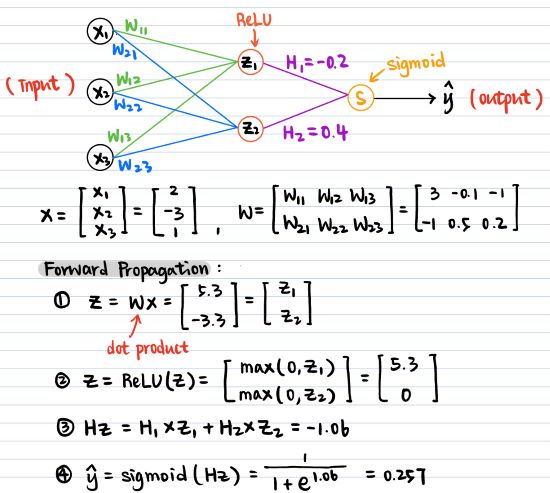

The following block of codes implements the **same neural network** shown in the example above:

In [2]:
#impor the pytorch libraries
import torch
import torch.nn as nn

#layer 1: 3 inputs and 2 outputs with weights w and no bias
L_1 = nn.Linear(in_features=3, out_features=2, bias=False)
L_1.weight.data = torch.from_numpy(np.array([[3,-0.1,-1],[-1,0.50,2]],dtype=np.float64)).float()

#layer 2: 2 inputs and 1 output with weights H and no bias
L_2 = nn.Linear(in_features=2, out_features=1, bias=False)
L_2.weight.data = torch.from_numpy(np.array([-0.2,0.4],dtype=np.float64)).float()

#construct the complete network by stacking up layers, as well as the activation functions in between
model = nn.Sequential(L_1,
                      nn.ReLU(),
                      L_2,
                      nn.Sigmoid())

#define the input x: store the input array [2,-3,1] as a tensor
x = torch.from_numpy(np.array([2,-3,1], dtype=np.float64)).float()

#call the forward method to compute the output y
y_hat = model.forward(x)
print(y_hat)

tensor(0.2573, grad_fn=<SigmoidBackward0>)


Yeah! We got the **same result** from the **neural network model** we just built from scratch!

Here, we already knew the **optimal weights** for each layer so all we need to do is just **reset the weights** to the optimal values. However, these **optimal weights** are usually **unknown** and should be find out by the model itself when performing a learning task.

A neural network finds the **optimal weights** by optimizing/minimizing a **loss function**.

## Loss Functions

**`Loss Functions`** are the functions that **evaluate** the performance of a model on a learning task.

For **regression problems**, the most commonly used loss function is the **sum of square errors**. For **classification problems**, the most oftenly used loss function for **neural networks** is the **cross-entropy**.

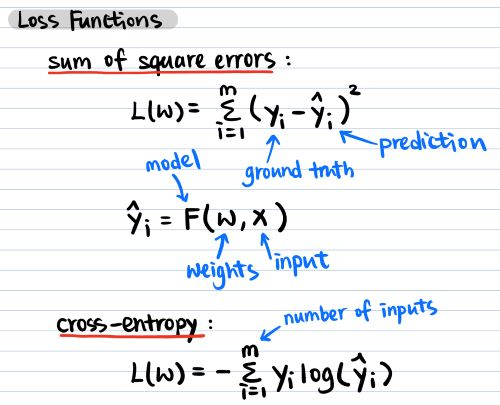

Let me show you an exmaple of how the **cross-entropy** of a **single prediction** is calculated:

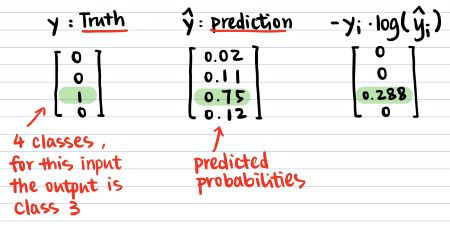

To find the **optimal parameters**, a neural network aims to **minimize** the loss function in order to obatin **predictions** that are the closest to the ground truth.

The **optimal paramters** are the parameters that set the **derivatives of the loss function** to zero. However, there are **a large number of paramaters** (weights and bias) which makes the caluclation of derivatives very hard. 

Luckily, we can use the technique called **backpropagation** to overcome this.

## Backpropagation

**`Backpropagation`** is an algorithm used to **effficiently compute the gradients** of the loss function with respect to the weights and bias.

I won't get into too much details of this algorithm at this stage, but the **key idea** of backpropagation is: compute the **derivatives** starting from the **last layer** and work **step-by-step backwards** to the first layer. Let me show you what this means with a very simple neural network:

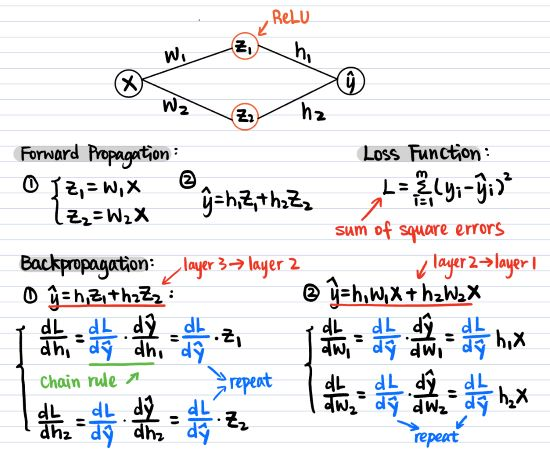

As demonstrated in the above diagram, the **backpropagtion** preocess starts by computing the **derivateives with respect to the weights $h$** in between the last and the middle layer. It then computes the **derivatives with respect to the weights $w$** between the middle and the first layer. With such a backward computation, there exist a **repeated term $\frac{dL}{d\hat{y}}$** which can be **calculated only once** and therefore makes the computation of derivatives **more efficient**.

Now you have obtained the **derivatives** of the loss function, but how to use them in finding the **optimal weights** for the neural network? A popular optimization algorithm comes into the play: **gradeint descent**.

## Gradient Descent

**`Gradient Descent`** is an **iterative optimization method** which is very commonly used in **hyperparameters optimization** for machine learning algorithms.

With an **initially randomized value** of weight, the **gradient descent** algorithm iteratively push the value towads the **opposite direction of the gradient** by an amount equal to a pre-defined **step size**. Eventually, the value of the weight will converge towards the optimal value that **minimizes the loss function**.

The **weight updating formula** during the process is give as: $w_{i+1} = w_{i} - α\frac{dL}{dw}$

Hard to image what this process is like? Let's take a look at the diagram below:

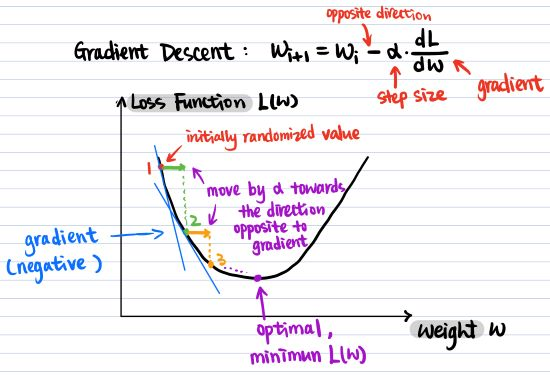

## Sum it up!

Great! Now you understand the following concepts:

1. **Forward propagtaion**: linear functions + activation functions
2. **Backpropagtaion**: efficient computation of the derivatives of the loss function
3. **Gradient Descent**: iterative optimization method to find the optimal weights and bias

To construct a neural network, we just have to bring these concepts together like this:

1. Define the network: number of **hidden layers** and **nodes**
2. Initialize the values for the **weights** and **bias**
3. Use **forward propagation** to obatain the output
4. Use **backpropagation** to obtain the derivatives of the loss function
5. Optimize the weights and bias iteratively with **gradient descent**

Then, you will have a well-trained neural network ready to perform predictive tasks.

<a id="3"></a>

# <center>Example: Simulating Logistic Regression with NN</center>

In this section, I will show you how to simulate a **logistic regression** with a **1-layer neural network** model.

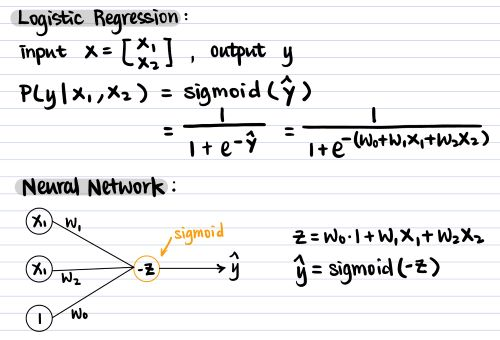

Let's say we now want to find the probability $P[y = 1 | x_1, x_2]$ where $w_0 = 1, w_1 = 0.3, w_2 = -0.1$ for the input $x = (x_1 = 1, x_2 = -2)$.

In [3]:
#calculate the probability directly
prob = sigmoid(-(1+0.3*1+(-0.1)*(-2)))
prob

0.18242552380635635

In [4]:
#set up the hidden layer
L_1 = nn.Linear(in_features=3, out_features=1, bias=0)
L_1.weight.data = -torch.from_numpy(np.array([[0.3,-0.1,1]], dtype=np.float64)).float()

#construct the network
model = nn.Sequential(L_1,
                      nn.Sigmoid())

#input data
x = torch.from_numpy(np.array([1,-2,1], dtype=np.float64)).float()

#use forward propagation to obtain the output
model.forward(x)

tensor([0.1824], grad_fn=<SigmoidBackward0>)

<a id="4"></a>

# <center> Example: Classification with Neural Network </center>

In this example, I will show you step-by-step how to **train** a neural network ffor **classification**.

In [5]:
import itertools
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Generate Data

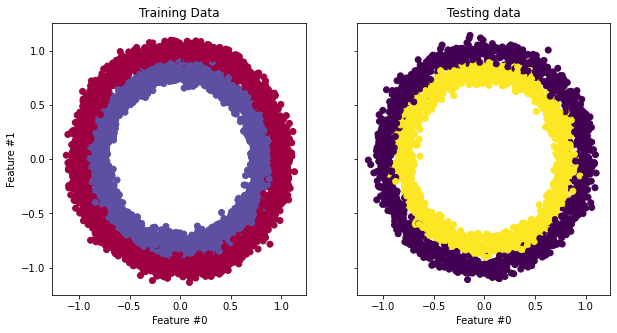

In [6]:
#generate non-linearly related data for classification
X, y = make_circles(n_samples = 10000, noise = 0.05, random_state = 26)

#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#visualize the train and test data
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

### Define the Dimensions and Parameters

In [7]:
#a single input data x will have 3 elements (x1,x2)
n_input = 2

#we will use 10 nodes for the hidden layer
n_hidden = 10

#a single output y will have only 1 element: the proability of positvie class
n_out = 1

#we will train 64 sets of (x,y) data at a time, this is called the batch size
batch_size = 64

#the step size for the gradient descent method is 0.05, this is also known as the learning rate
learning_rate = 0.05

### Data Preparation

We need to store the training and test data as **tensors** so that the computation of the algorithm will be **more efficient**.

Then, we will load the training and test data as **batches** ready for training and evalution.

In [8]:
#store the training and test data as tensors 
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
    
#load the training and test data as batches
batch_size = 64
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

#check that each batch has the correct dimensions
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


### Define the Model, Loss Function and Optimizer

In [9]:
#layer 1
L_1 = nn.Linear(in_features=n_input, out_features=n_hidden, bias=True)

#layer 2
L_2 = nn.Linear(in_features=n_hidden, out_features=n_out, bias=True)

#construct the network
model = nn.Sequential(L_1,
                      nn.ReLU(),
                      L_2,
                      nn.Sigmoid())

print(model)

#choose the Binary Cross Entropy as our loss function
loss_function = nn.BCELoss()

#choose the stochastic gradient descent method as our optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


### Train the Model

In [10]:
losses = []
n_epochs = 200

for i in range(n_epochs+1):
    for X, y in train_dataloader:
        y_hat = model(X)                                    #compute the output with forward propagation
        loss = loss_function(y_hat, y.unsqueeze(-1))        #compute the loss function
        losses.append(loss.item()) 
        model.zero_grad()                                   #set the gradients to zero
        loss.backward()                                     #backward propagation
        optimizer.step()                                    #gradient descent
    if i % 50 == 0:
        print(f'{i} iterations completed, the current loss is: {loss}')

0 iterations completed, the current loss is: 0.6848602294921875
50 iterations completed, the current loss is: 0.16125331819057465
100 iterations completed, the current loss is: 0.14090096950531006
150 iterations completed, the current loss is: 0.051065538078546524
200 iterations completed, the current loss is: 0.11530128121376038


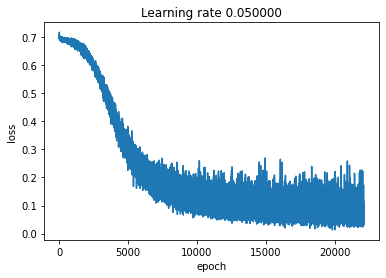

In [11]:
#visualize the minimization process of the loss function 
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

### Make Predictions

In [12]:
y_pred, y_test = [],[]
total, correct = 0, 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs<0.5, 0, 1)            #classify the output as 1 only when the probability is above 0.5
        predicted = list(itertools.chain(*predicted))
        y_pred += list(predicted)
        y_test += list(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

### Evaluate the Model

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1502
         1.0       0.96      0.96      0.96      1498

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



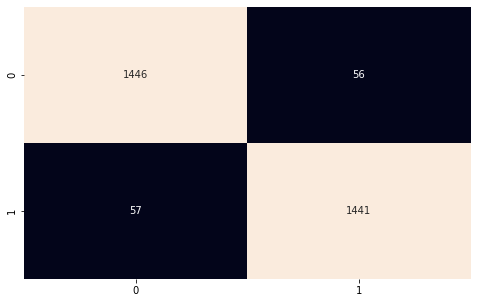

In [13]:
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(8, 5))
sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")
plt.show()